In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [2]:
df = pd.read_csv('/home/evelin/Downloads/movies.csv')

In [3]:
#df.dropa(subset=['genre'])

In [4]:
df.set_index('filename', inplace=True)
df

,Unnamed: 0,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
filename,,,,,,,,,,,,,,,,,,,
6416324.xml,706,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90.0,7.0,80.0
4732286.xml,2784,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75.0,5.8,36.0
6122081.xml,3085,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78.0,7.0,34.0
5594522.xml,6044,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,nm1172472,NaN,movie,Brawl Busters,Sa-dae-tong-iue-moon,0.0,1978.0,NaN,82.0,6.2,31.0
5618549.xml,6281,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,"nm0032816,nm0793999,nm0814232",movie,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96.0,5.7,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,61169,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,nm2670218,"nm0613444,nm4963204",movie,Blame!,Blame!,0.0,2017.0,NaN,106.0,6.7,6489.0
7036888.xml,61184,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,nm0372366,nm6782145,movie,Take Me,Take Me,0.0,2017.0,NaN,83.0,6.1,3596.0
6984880.xml,61244,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,"nm1412827,nm2595452,nm1906442","nm1906442,nm2595452,nm1412827",movie,Get Me Roger Stone,Get Me Roger Stone,0.0,2017.0,NaN,92.0,7.4,6030.0


In [5]:
df['main_genre'] = df.genre.str.split(',')

In [6]:
dff = df.main_genre
dff

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
7017079.xml                            NaN
Name: main_genre, Length: 3729, dtype: object

In [7]:
dff_f = dff.dropna()
#dff_f = dff.drop_duplicates()
dff_f

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7063865.xml               [Drama, Romance]
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
Name: main_genre, Length: 3722, dtype: object

In [8]:
dff_f = dff_f.apply(lambda x: x[0])
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3722, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df.text)

In [13]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(X_tfidf)

In [22]:
Xr_tfidf

array([[-4.2533245,  6.5731163],
       [-2.4228108,  8.235745 ],
       [-3.5171535, 12.00442  ],
       ...,
       [-1.3963377,  6.1275377],
       [-4.0460377,  6.973394 ],
       [-1.32039  ,  8.240492 ]], dtype=float32)

In [39]:
Xr_tfidf.shape

(3729, 2)

In [18]:
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3722, dtype: object

In [19]:
df["main_single_genre"] = dff_f

In [20]:
df

,Unnamed: 0,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_genre,main_single_genre
filename,,,,,,,,,,,,,,,,,,,,,
6416324.xml,706,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",...,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90.0,7.0,80.0,"[Adventure, Drama, History]",Adventure
4732286.xml,2784,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,"nm0440757,nm0833141,nm1127102",...,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75.0,5.8,36.0,[Comedy],Comedy
6122081.xml,3085,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,nm0816215,...,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78.0,7.0,34.0,[Drama],Drama
5594522.xml,6044,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,nm1172472,NaN,...,Brawl Busters,Sa-dae-tong-iue-moon,0.0,1978.0,NaN,82.0,6.2,31.0,"[Action, Adventure]",Action
5618549.xml,6281,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,"nm0032816,nm0793999,nm0814232",...,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96.0,5.7,44.0,[Action],Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,61169,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,nm2670218,"nm0613444,nm4963204",...,Blame!,Blame!,0.0,2017.0,NaN,106.0,6.7,6489.0,"[Animation, Sci-Fi]",Animation
7036888.xml,61184,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,nm0372366,nm6782145,...,Take Me,Take Me,0.0,2017.0,NaN,83.0,6.1,3596.0,"[Comedy, Crime]",Comedy
6984880.xml,61244,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,"nm1412827,nm2595452,nm1906442","nm1906442,nm2595452,nm1412827",...,Get Me Roger Stone,Get Me Roger Stone,0.0,2017.0,NaN,92.0,7.4,6030.0,"[Biography, Documentary]",Biography


## Visualization all Data

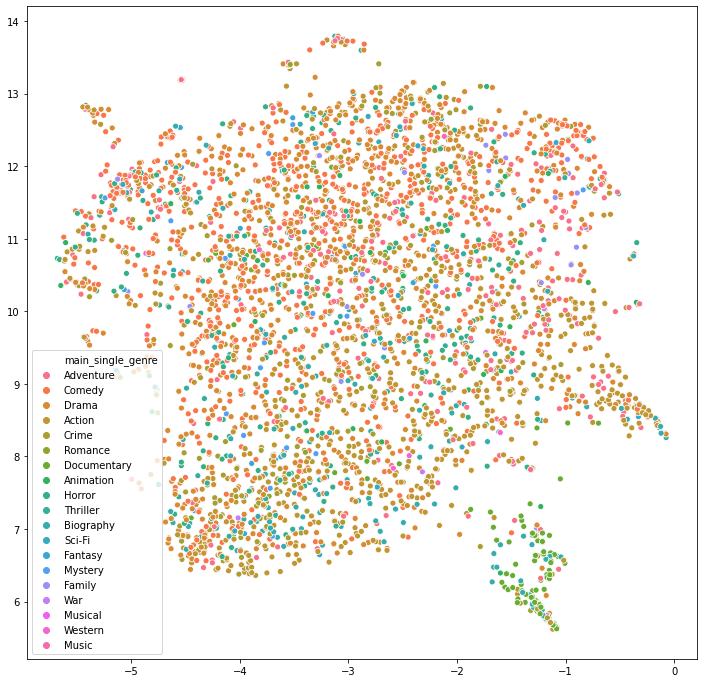

In [21]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_single_genre'])
plt.show()

In [23]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df.main_single_genre.loc[df.main_single_genre == "Crime"])
plt.show()

ValueError: array length 3729 does not match index length 224

<Figure size 864x864 with 0 Axes>

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=19)
kmeans.fit(Xr_tfidf)
y_kmeans = kmeans.predict(Xr_tfidf)

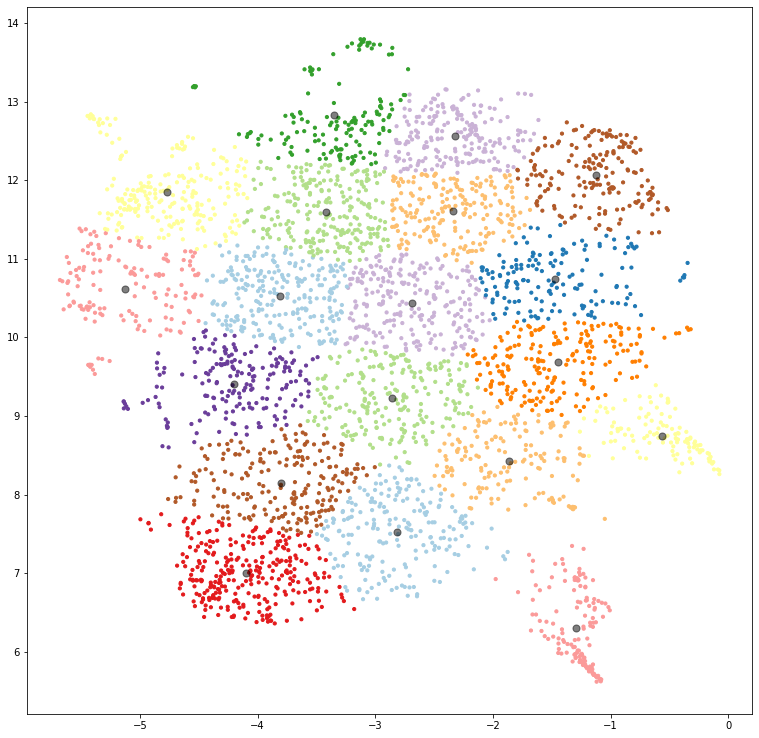

In [70]:
plt.figure(figsize =(13,13))
plt.scatter(Xr_tfidf[:, 0], Xr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)



In [71]:
df['clusterID'] = kmeans.labels_

In [86]:
df.clusterID

filename
6416324.xml     8
4732286.xml     9
6122081.xml     3
5594522.xml    11
5618549.xml    11
               ..
7007863.xml     0
7036888.xml     8
6984880.xml     7
7000718.xml     8
7017079.xml     9
Name: clusterID, Length: 3729, dtype: int32

In [108]:
d=df.T

In [112]:
d.loc[["main_single_genre", "clusterID"]]

filename,6416324.xml,4732286.xml,6122081.xml,5594522.xml,5618549.xml,4208202.xml,6254411.xml,4662660.xml,5116660.xml,6235492.xml,...,7040848.xml,7057670.xml,7010381.xml,7017380.xml,7063865.xml,7007863.xml,7036888.xml,6984880.xml,7000718.xml,7017079.xml
main_single_genre,Adventure,Comedy,Drama,Action,Action,Action,Drama,Crime,Drama,Romance,...,Documentary,Documentary,Documentary,Documentary,Drama,Animation,Comedy,Biography,Sci-Fi,NaN
clusterID,8,9,3,11,11,8,2,14,3,10,...,7,0,7,7,11,0,8,7,8,9


KeyError: 'clusterID'